Notebook for inference.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install spacy==3.1.1

     |████████████████████████████████| 6.4 MB 871 kB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 456 kB 51.6 MB/s 
     |████████████████████████████████| 621 kB 53.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

In [3]:
!pip install fastai==2.4.1

     |████████████████████████████████| 188 kB 844 kB/s 
     |████████████████████████████████| 22.1 MB 6.1 MB/s 
     |████████████████████████████████| 831.4 MB 1.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.1
    Uninstalling torchvision-0.8.1:
      Successfully uninstalled torchvision-0.8.1
  Attempting uninstall: fastai
    Found existing installation: fastai 2.2.7
    Uninstalling fastai-2.2.7:
      Successfully uninstalled fastai-2.2.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kornia 0.5.5 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
allennlp 2.5.0 requires spacy<3.1,>=2.1.0, but you have spacy 3.1.1 which is incompatible.
alle

In [4]:
from fastai.vision.all import *

In [5]:
path = Path('../input')
op_path = Path(".")

## getfiles(path: Path, ext)

In [6]:
def getfiles(path: Path, ext):
    "Get numpy files in `path` recursively, only in `folders`, if specified."
    return L(path.glob(f'**/*.{ext}'))

In [7]:
%%time
files = getfiles(path/'g2net-test-imgs-with-gwpy/kaggle/tmp/test', 'png')

CPU times: user 5.24 s, sys: 7.4 s, total: 12.6 s
Wall time: 7min 13s


In [8]:
len(files)

226000

In [9]:
test_df = pd.DataFrame([f.name.replace(".png", "") for f in files], columns=['id'])

In [10]:
test_df.shape

(226000, 1)

In [11]:
test_df.head(1)

,id
0,e00760b7b6


## Load the model

In [12]:
learn = load_learner(path/'g2gwd-base-model-fastai-resnet/final', cpu=False)

In [13]:
learn.dls.device

device(type='cuda', index=0)

## Create the test dataloader

In [14]:
tst_dl = learn.dls.test_dl(files)

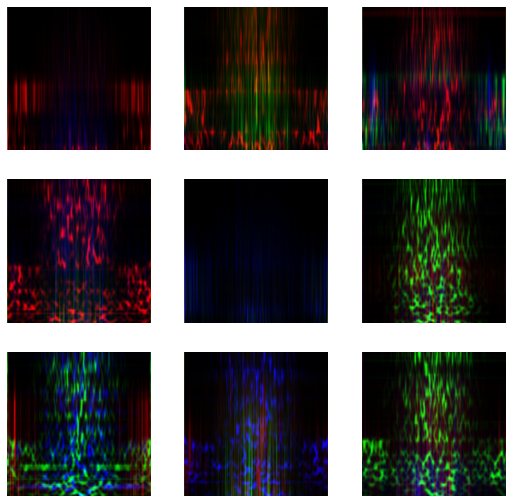

In [15]:
tst_dl.show_batch()

In [16]:
preds = learn.get_preds(dl=tst_dl)[0]

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [17]:
np.array(preds)[:2]

array([[0.49271822, 0.5072818 ],
       [0.5026599 , 0.49734008]], dtype=float32)

In [18]:
final_preds = [pred[0] for pred in np.array(preds)]
final_preds[:3]

[0.49271822, 0.5026599, 0.50107515]

## Bringing them altogether in a submission file

In [19]:
test_df['target'] = np.array(final_preds)
test_df.to_csv('submission.csv', index=False)
test_df.head()

,id,target
0,e00760b7b6,0.492718
1,29ba405e4a,0.502660
2,0a44916a14,0.501075
3,aaa9ca1e5b,0.503845
4,6b3367face,0.498721
